# Project 3.6. California II: Using Matrices
## Hector Lugo Barrios, M42 S21

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
from numpy import math


### 1. Rates

In [2]:
table = np.array([[0.1315060, 0.04727440715, 0.08654142285], [0.1282137268, 0.0487697, -0.007390749727]])

In [3]:
print(table)

[[ 0.131506    0.04727441  0.08654142]
 [ 0.12821373  0.0487697  -0.00739075]]


### 2. Matrix Model

In [4]:
I = np.identity(2)
B = np.array([[0.1315060, 0], [0, 0.1282137268]])
D = np.array([[0.04727440715, 0], [0, 0.0487697]])
M = np.array([[0.08654142285, 0], [0, -0.007390749727]])
G = I + B - D + M
x0 = np.array([12988, 152082])
print(G)
print("---------------------------------------")
print(G @ x0)

[[1.17077302 0.        ]
 [0.         1.07205328]]
---------------------------------------
[ 15205.99992791 163040.00648382]


This model accurately gives the 1960 data.

### 3. Predictions

In [5]:
ts = (2020 - 1960)/5
t_steps = int(ts)
print(t_steps)

12


In [6]:
G_12 = matrix_power(G, t_steps)
print(G_12)

[[6.63242656 0.        ]
 [0.         2.3046046 ]]


In [7]:
pop_2020 = G_12 @ x0
print(pop_2020)

[ 86141.95613352 350488.87695447]


In [8]:
# Data obtained from https://www.worldometers.info/world-population/us-population/
# and https://www.census.gov/quickfacts/CA
true_pop_2020 = np.array([(39538223/1000), ((331002651-39538223)/1000)])

In [9]:
print(true_pop_2020)

[ 39538.223 291464.428]


<function matplotlib.pyplot.show(close=None, block=None)>

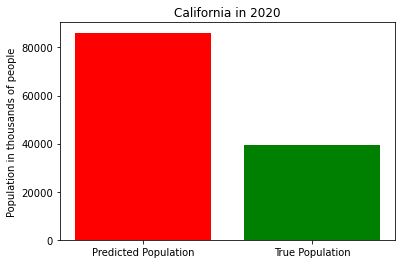

In [10]:
labels = ['Predicted Population', 'True Population']
values = [pop_2020[0], true_pop_2020[0]]
plt.bar(labels, values, color = ["red", "green"])
plt.ylabel('Population in thousands of people')
plt.title('California in 2020')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

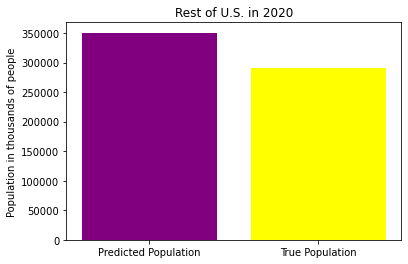

In [11]:
labels = ['Predicted Population', 'True Population']
values = [pop_2020[1], true_pop_2020[1]]
plt.bar(labels, values, color = ["purple", "yellow"])
plt.ylabel('Population in thousands of people')
plt.title('Rest of U.S. in 2020')
plt.show

### 4. Long-Term Analysis

In [12]:
evals, evecs = la.eig(G)
#print(evals)
#print(evecs)
deval = max(abs(evals))
print("The dominant eigenvalue is", deval)
print("The vector associated with the dominant eigenvalue is", evecs[0])

The dominant eigenvalue is 1.1707730157
The vector associated with the dominant eigenvalue is [1. 0.]


We obtained these interesting eigenvalues and eigenvectors due to the fact that the matrix G is a diagonal matrix, so the eigenvalues are the diagonal entries. 
<br>This is not a realistic scenario, because it implies that in the long run all the population will be in California.
<br>The populations are growing at a rate of 17% and 7.2%, respectively.
<br>The long-term proportions of people in California is 100% and rest of U.S. 0%, which is again, unrealistic.

### 5. Higher Resolution Migration Model

In [13]:
T = np.array([[0.9373267632, 0.01274312542], [0.06267323683, 0.9872568746]])
print(T)

[[0.93732676 0.01274313]
 [0.06267324 0.98725687]]


In [14]:
Tevals, Tevecs = la.eig(T)
print("The eigenvalues are", Tevals)
#print(Tevecs)
Tdeval = max(abs(Tevals))
print("The dominant eigenvalue is", Tdeval)

The eigenvalues are [0.92458364+0.j 1.        +0.j]
The dominant eigenvalue is 1.0000000000216898


This is a model for a nonabsorbing Markov chain because we don't have absorbing states. Moving to California doesn't have a probability of 1 of staying in California, and the same applies to the rest of U.S.
<br> The eigenvalues do not make sense under the stated conditions, the model is still incomplete.

### 6. Putting It All Together

In [15]:
Gc = B - D + T
print(Gc)

[[1.02155836 0.01274313]
 [0.06267324 1.0667009 ]]


In [16]:
x0 = np.array([12988, 152082])
p1965 = Gc @ x0
print(p1965)

[ 15205.9999285  163040.00648666]


In [17]:
eval, evec = la.eig(Gc)
print(eval)
print(evec)
Gcdeval = max(abs(eval))
print("The dominant eigenvalue is", Gcdeval)
print("The vector associated with the dominant eigenvalue is", evec[1])

[1.00796175+0.j 1.0802975 +0.j]
[[-0.68383572 -0.21201253]
 [ 0.72963601 -0.97726695]]
The dominant eigenvalue is 1.0802975049077572
The vector associated with the dominant eigenvalue is [ 0.72963601 -0.97726695]


Computation error in the last part, I got negative values mixed with positive in the vector associated with dominant eigenvalue. I'm not sure where I messed up :(